# Module 3.1 Numerical Integration (1 of 2)

Throughout physics we encounter the need to evaluate integrals.
For example, work is the line integral of a force along a path, Gauss' law relates the surface
integral of the electric field to the enclosed charge, the action is the integral of the Lagrangian,
_etc_.

## Learning objectives:
* Be able to numerically compute an integral using left/right/midpoint methods.
* Make an assessment of the accuracy of the integral and plot the error as a function of the number of intervals

# Pre-class

Remind yourself of Reimann sums, either through your calculus textbook and/or this [video](https://youtu.be/rfG8ce4nNh0)

Download the PDF of [TAK](https://catalog.lib.ncsu.edu/record/NCSU4441969) and read Sec 3.3, up to at least page 53. You will probably find it helpful to read along using a paper/pencil, and/or be able to draw on your PDF.


# In-class


## Preliminary: computing sums

As part of this section, we'll need to know how to compute some sums.  Recall that there are a few ways of doing that.  Recall that we computed the sum of an array of numbers `xarray` using:

    # ################################################
    # For loop type 1
    
    # Prepare a variable to store the sum
    mysum=0
    
    # Loop over indices
    for i in range(len(xarray)):
        mysum = mysum + xarray[i]
        
    # ################################################
    # For loop type 2
    # Prepare a variable to store the sum
    mysum=0
    
    # Loop over values
    for x in xarray:
        mysum = mysum + x
    
    # ################################################
    # No loops -- use the built-in `sum` function
    mysum = np.sum( xarray )
    
If you're ever confused about what a numpy function does, Google is your friend:
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.sum.html. Although the documentation may be somewhat overwhelming at times, there is usually a simple example or two at the bottom of the page.

**Exercise**: Compute the sum of the numbers ``1.0`` through ``10.0`` (inclusive) separated by ``1`` using all three the methods above.  You'll need to generate the `xarray`.  Print it before you sum, just to make sure you have it right.

In [ ]:
# Method 1
xarray = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
print(xarray)

# Now copy the for loop from above

# ################################################ loop copied
# For loop type 1

# Prepare a variable to store the sum
mysum=0

# Loop over indices
for i in range(len(xarray)):
    mysum = mysum + xarray[i]
    print(mysum) #I just want to see what's going on here


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
1.0
3.0
6.0
10.0
15.0
21.0
28.0
36.0
45.0
55.0


In [ ]:
# Method 2

xarray = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
print(xarray)
# ################################################ loop 2 copied
# For loop type 2
# Prepare a variable to store the sum
mysum=0

# Loop over values
for x in xarray:
    mysum = mysum + x
    print(mysum)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
1.0
3.0
6.0
10.0
15.0
21.0
28.0
36.0
45.0
55.0


In [ ]:

# Method 3

import numpy as np #added due to errors

xarray = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
print(xarray)
# ################################################ loop 3 copied
# No loops -- use the built-in `sum` function
mysum = np.sum( xarray )
print(mysum)


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
55.0


## Rectangle Methods


The integral of a function is the "area under the curve". (This is the case for most functions we encounter in
physics. Some exotic functions require a more sophisticated definition of the integral.) The area under the
curve $f(x)$ from $x=a$ to $x=b$ can be approximated as the sum of the areas of the rectangles shown in the figure:

![Integration rectangles](https://upload.wikimedia.org/wikipedia/commons/e/ea/Integration_rectangle.png)

The rectangles are formed by dividing the interval $[a,b]$ into $N$ subintervals, from $[x_0,x_1]$, to
$[x_{N-1},x_N]$. (Note that $x_0 = a$ and $x_N = b$.) The height of each rectangle is the value of the function
at some point $\bar x_i$ within the subinterval
$[x_{i-1},x_i]$. The area of the $i$th rectangle is the product of the height $f(t_i)$ and the width $x_{i} - x_{i-1}$.
Then the integral

$$
I = \int_a^b f(x)\, dx
$$

is approximated by the sum of the areas of the rectangles:

$$
I \approx \sum_{i=0}^{N-1} f(\bar x_i)\,(x_i - x_{i-1})
$$

This approximation is called the Riemann sum. The exact value for $I$ is obtained by taking the limit $N\to \infty$.

In practice we must choose where to place the $x_i$'s and  $\bar x_i$'s before using the Riemann sum to
approximate the integral $I$. Different choices lead to different numerical integration methods.
The simplest choice for the $x_i$'s is to make them equally spaced between the endpoints. That is,
let $h = (b-a)/N$ denote the width of each subinterval, with

$$
x_i = a + ih
$$

for $i = 0,\ldots N-1$. There are three obvious choices for the $\bar x_i$'s:

1) With $\bar x_i = x_{i} = a + ih $, the height of each rectangle
is the value of the function at the left side of the subinterval. This yields the _left endpoint rule_ approximation to $I$:

$$
I_L =  \sum_{i=0}^{N-1} f(a + ih) \, h
$$

2) With $\bar x_i = x_{i+1} = a + (i+1)h$, the height of each rectangle is the value of the function at the right side of the subinterval. This
is the _right endpoint rule_

$$
I_R =  \sum_{i=0}^{N-1} f(a + (i+1)h) \, h
$$

3) With $\bar x_i = (x_i + x_{i+1})/2 = a + ih +h/2$, the height of each rectangle is the value of the
function at the midpoint of the subinterval. This yields

$$
I_M =  \sum_{i=0}^{N-1} f(a + (i+1/2)h) \, h
$$

which is called the "midpoint rule".

Exercise
----------
Write a code some integrate the function $f(x) = \sin x$ between $a=0$ and $b=\pi/2$ using both
the left and right endpoint rules. Structure your code so that it's easy to change $f(x)$, $a$, $b$, and the
number of subintervals $N$. I suggest that you make a function of the form:

    def leftpoint(f, a, b, N):

where you may pass in the function `f` (defined elsewhere), and the variables `a`, `b` and `N`.

Compare your results of left/right endpoint to each other, and to the correct value.
Your results should become more accurate as you increase the number of subintervals $N$.

In [11]:
import numpy as np

f = np.sin
a = 0
b = (np.pi/2)
N = 3

def leftpoint(f, a, b, N):

  delta_x = (b-a)/N

  mysum = 0

  for i in range(N):

    mysum = mysum + (f(a+(i*delta_x)) * delta_x)

  return mysum


N = 1000
result=leftpoint(np.sin,0,np.pi/2,N)
print("The result of the integral for ",N," intervals is",result)




The result of the integral for  1000  intervals is 0.9992143962198362


You may notice that the answer is not exactly close to the real answer.  Let's investigate how poorly we're doing.  We can do this here by computing the integral for a variable number of intervals ($N_1, N_2, N_3, ...$).  Suppose we do this for $m$ intervals.  We'll need some storage space, and to compute the integral for each $N_m$.

Exercise
--------
Compute the integral of $sin(x)$ from $x=0$ to $x=\pi/2$ using the leftpoint rule using $N=2,4,8,16,32,64,128,256,512,1024$.  Make a plot of the answer as a function of $N_m$.

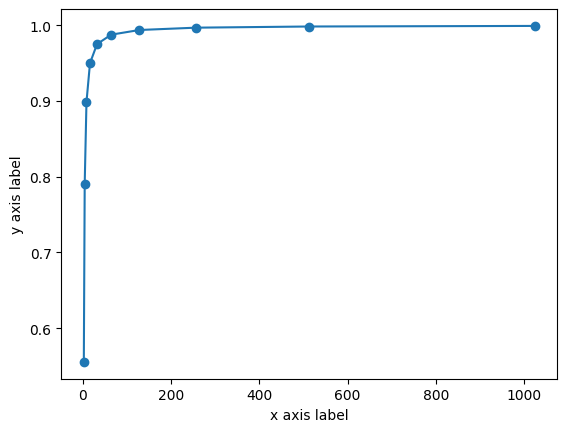

In [12]:
import pylab as py
import numpy as np

Nlist = [2,4,8,16,32,64,128,256,512,1024]
anslist = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]# An array of zeros the same size as Nlist

# Note the use of `enumerate` here.  We'll want to store the result in a
# different array than the one we're looping over, so `enumerate`
# makes sense.
for iN, N in enumerate(Nlist):
    anslist[iN] = leftpoint(np.sin,0,np.pi/2,N) # Evaluate the integral using the function you defined

py.plot(Nlist, anslist,'o-')
py.xlabel('x axis label')
py.ylabel('y axis label')
py.show()

Eventually, for large N, it looks like we approach the right answer.  It's somewhat hard to see exactly how
close we get on these scales,
so let's adjust.  Make a plot of $\log(|$calculated answer - real answer$|)$ vs $\log(N_m)$. $|x|$ indicates the absolute value of $x$, and it's implemented in `numpy` as `numpy.abs()`.

_Question:_ Which base is the logarithm computed in?  How could you change it?  (Google is your friend)

_Note:_ you can probably re-use your array of answers from above!

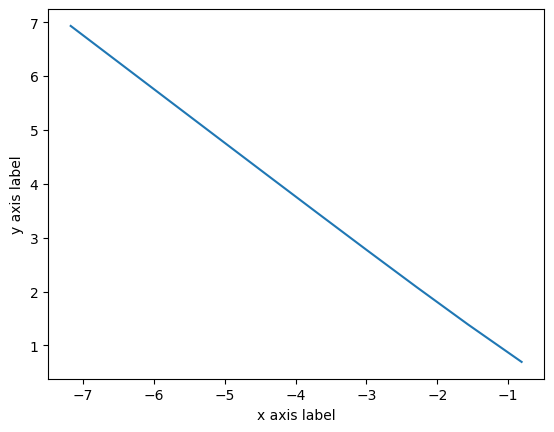

In [20]:
# how to make a log function

#np.log(data inside log) for log function
#np.abs(data) for absolute value function
#N_m is the Nlist

real_answer = 1
absolute_value = [np.abs(x - real_answer) for x in anslist] #Cordell helped out a lot with this, thank you!

x_var = np.log(absolute_value)
y_var = np.log(Nlist)

py.plot(x_var, y_var)
#py.plot(## Some stuff ##)
py.xlabel('x axis label')
py.ylabel('y axis label')
py.show()

If all went well, you got a straight line.  What is the slope?

Intuitively, we expect the midpoint rule to give a better approximation to the area under the curve than the left or right
endpoint rules.

# Post-class

If you didn't make it to the end (that's fine!), the remaining exercises (above) are to be completed on your own time, so that you are ready to start Module 3.2 which picks up where this one left off. Because these two modules work together, you will benefit most from Module 3.2 if you have draft versions of HW 3.1 and 3.2 (below) done beforehand.

If you feel like you can't make it the rest of the way through on your own, please get HELP! from the instructors or your groupmates or on the Forum.

If you make it to the end of the Module before the end of class: great! You have time to start work on the homework problems for this module.

## Homework 3.1 (JHub + $\LaTeX{}$)

a) Write a function `midpoint` which integrates a function `f` from $a$ to $b$, using $N$ intervals. This function will take the form:
* Input: f,a,b,N
* Output: the integration

For this problem, JHub nbgrader will auto-check that your `midpoint` function generates the correct output. You will need to have the exact input/output specified in this problem. Please also include a copy of your code in your $\LaTeX{}$ writeup.

b) For the definite integral of $f(x) = \sin x$ from $a$ to $b$  from $a=0$ and $b=\pi/2$, compute the error for $N = 2,4,8,16,32, 64, 128, 256$ and make a log-log plot of the absolute value of the error versus $N$.

c) The error is proportional to some power of $N$. What is that power?

d) **On the same plot**, show the results from the leftpoint integration  (Make sure to properly label the figure!). Hint: you can just change the name of the function call from `midpoint` to `leftpoint`, and rerun the same code! Include a copy of your `leftpoint` code in your $\LaTeX{}$ writeup.  

e) Which method is better?  And, how much better?

## Homework 3.2 ($\LaTeX{}$)

a) Use the midpoint rule to evaluate the integral
    
$$
I =  \int_0^{100} \sin(x^2)\,dx
$$

b) Make a table showing $N$ and $I$ for increasing values of $N$. We may consider a value accurate to a certain number of digits if the answer doesn't change when you increase $N$. **Hint:** Plot the function on the array you're planning on evaluating the integral on to see whether you capture what the function is doing.

c) Approximately how many subintervals are required for your answer to be
accurate to 3 significant figures? 4 significant figures? 5 significant figures? How did you decide this?

# Acknowledgements

This module was developed by Karen Daniels at NCSU for PY251.